<a href="https://colab.research.google.com/github/hajdekd/Data-Science-Projects/blob/main/Dalibor_Hajdek_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Assignment


# Context
There is a huge demand for used cars after the COVID-19 pandemic. Dealership are still uncertain about both the pricing and supply of used cars compared to pre-COVID era. In this project, you will build a regression model to predict the future prices of used cars that a dealership can rely on the model prediction. 

# Data Description  

1. S.No. : Serial Number
2. Name : Name of the car which includes Brand name and Model name
3. Location : The location in which the car is being sold or is available for purchase Cities
4. Year : Manufacturing year of the car
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission : The type of transmission used by the car. (Automatic / Manual)
8. Owner : Type of ownership
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg
0. Engine : The displacement volume of the engine in CC.
1. Power : The maximum power of the engine in bhp.
2. Seats : The number of seats in the car.
3. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
4. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

## Python Good Coding Practice

In [ ]:
!pip install nb_black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 7.9 MB/s 
     |████████████████████████████████| 843 kB 50.7 MB/s 
     |████████████████████████████████| 96 kB 7.2 MB/s 
     |████████████████████████████████| 1.6 MB 46.3 MB/s 
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5297 sha256=f8dd39261da428457e0c3ce9b3f88f6add3fee4ba9852c071ef40b957bbd8aa4
  Stored in directory: /root/.cache/pip/wheels/1e/b2/88/51c66d23ea5fd0d40ed50997555e15d981d92671376a9a412a
Successfully built nb-black
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.

In [ ]:
# Loading the nb_black to make Python code more structured automatically
%load_ext nb_black

<IPython.core.display.Javascript object>

# Importing Needed Libraries

In [ ]:
#Loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings

warnings.filterwarnings("ignore")

# removing the limit from the number of displayed columns and rows
pd.set_option("display.max_columns", None)

# displaying 200 rows of the data frame, the default  is much smaller
pd.set_option("display.max_rows", 200)

# building linear regression model for prediction
from sklearn.linear_model import LinearRegression

# checking model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Loading Data

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data
data = pd.read_csv('/content/drive/MyDrive/UsedCars.csv')

# Exploring the Data (EDA)

In [ ]:
# Viewing first 5 rows of the dataset
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
# Viewing last 5 rows of the dataset
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [ ]:
#Getting the shape of the dataset
data.shape

(7253, 14)

Observation:

* The dataset has 7253 rows and 14 columns








In [ ]:
#Printing the columns 
print(data.columns)

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


In [ ]:
#Printing the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


Observation:

* Dependent variable is Price and it is float type. 
* Name, Location, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power and New_Price are of  object type.
* S.No., Year, Kilometers_Driven and Seats are numeric type.

In [ ]:
#Getting the summary of the numerical varaibles
data.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


Observation:

* Price ranges from 0.44 to 160.00.
* Vast majority of the cars come with 5 seats.
* The average for kilometers driven is around 59 000 kilometers.

In [ ]:
#Checking the dataset for missing values
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

Observation:

* Mileage has 2 missing values
* Engine has 46 missing values
* Power has 46 missing values
* Seats has 53 missing values
* New_Price has 6247 missing values
* Price has 1234 missing values

# Data Pre-processing

In [ ]:
#Droping irrelevant columns
data.drop(["Name","S.No.", "New_Price"], axis=1, inplace=True)

In [ ]:
#Filling the missing values
data = data.ffill().dropna()

In [ ]:
#Checking the dataset agian for missing values
data.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
#Dropping some undefined values from Power variable
data.drop(index=data[data['Power'] == 'null bhp'].index, inplace=True)

In [ ]:
#Removing everything but numerical values from Mileage, Engine and Power columns
data['Mileage'] = data['Mileage'].str.replace(r"[a-zA-Z-/]",'')
data['Engine'] = data['Engine'].str.replace(r"[a-zA-Z-/]",'')
data['Power'] = data['Power'].str.replace(r"[a-zA-Z%-/]",'')

In [ ]:
#Converting Mileage, Engine and Power to numerical data types
data['Mileage'] = data['Mileage'].astype(float).round(2)
data['Engine'] = data['Engine'].astype(int)
data['Power'] = data['Power'].astype(float).round(2)

In [ ]:
#Getting the datset info after the conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7123 entries, 0 to 7252
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7123 non-null   object 
 1   Year               7123 non-null   int64  
 2   Kilometers_Driven  7123 non-null   int64  
 3   Fuel_Type          7123 non-null   object 
 4   Transmission       7123 non-null   object 
 5   Owner_Type         7123 non-null   object 
 6   Mileage            7123 non-null   float64
 7   Engine             7123 non-null   int64  
 8   Power              7123 non-null   float64
 9   Seats              7123 non-null   float64
 10  Price              7123 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 667.8+ KB


# Data Visualization

## Univariate Analysis

In [ ]:
# This function takes the numerical column as the input and returns the
# boxplots and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="green"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

Price (the target variable)

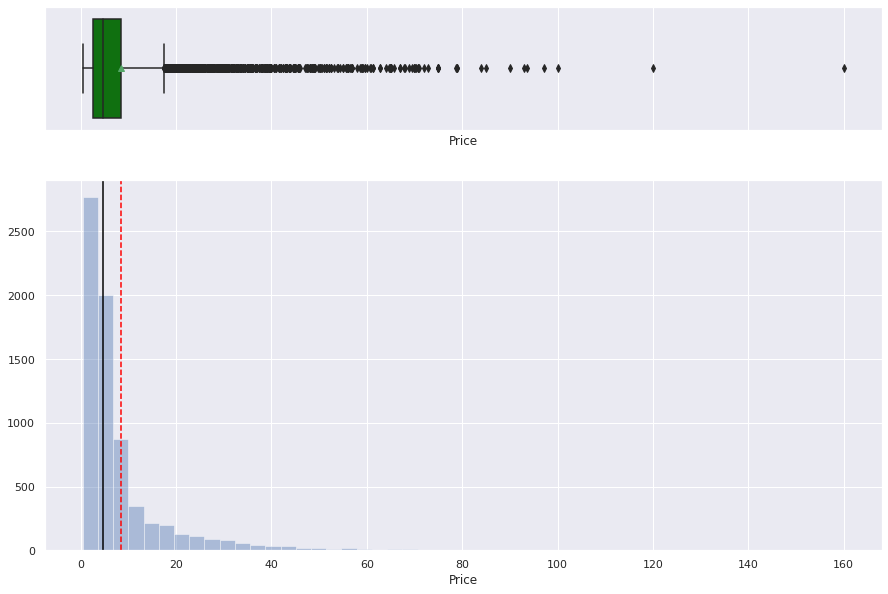

In [ ]:
histogram_boxplot(data["Price"])

Observation: 

*  The distribution is right-skewed with majority of values between 0 to 5000.

Year

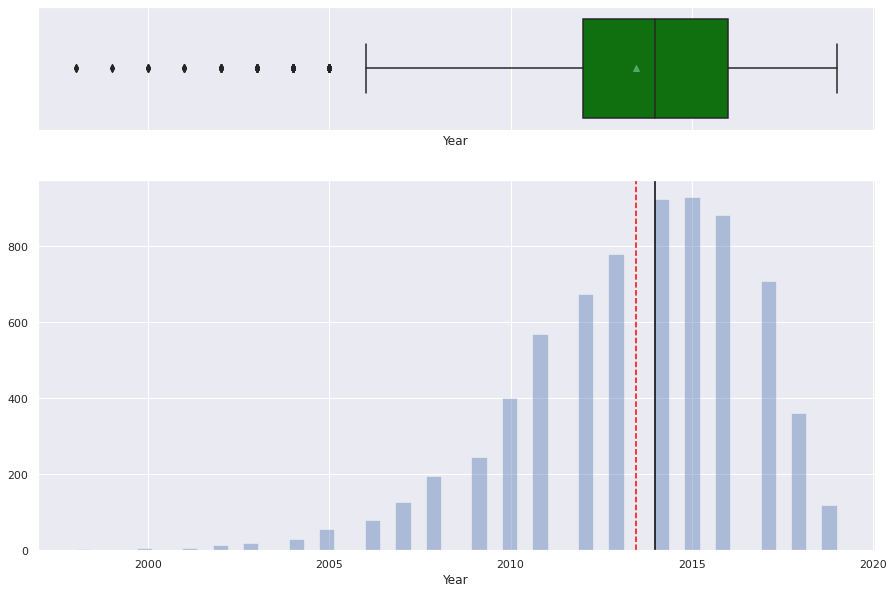

In [ ]:
histogram_boxplot(data["Year"])

Observation:

*  The sistribution is left-skewed with most cars made at 2015.

Kilometers Driven

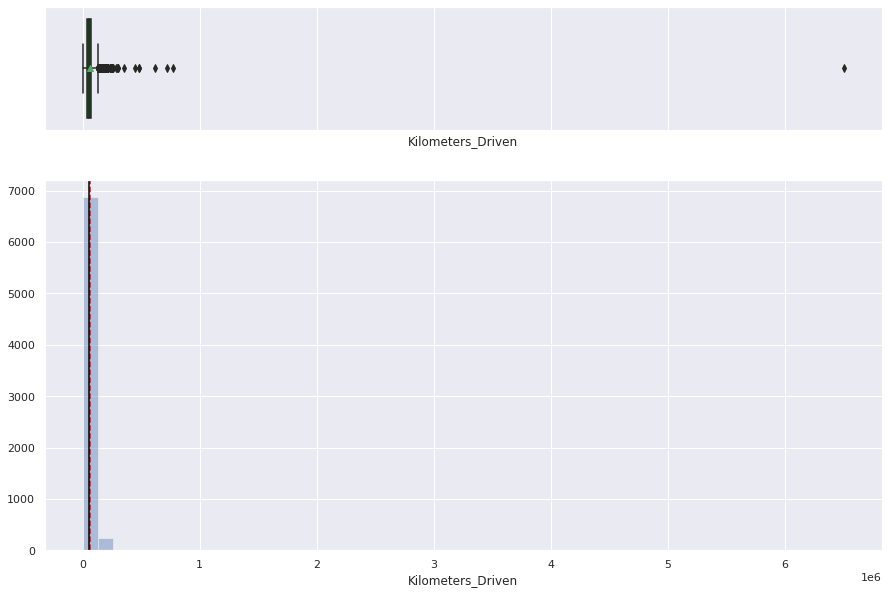

In [ ]:
histogram_boxplot(data["Kilometers_Driven"])

Observation:

*  The distribution is heavily right-skewed.

Seats

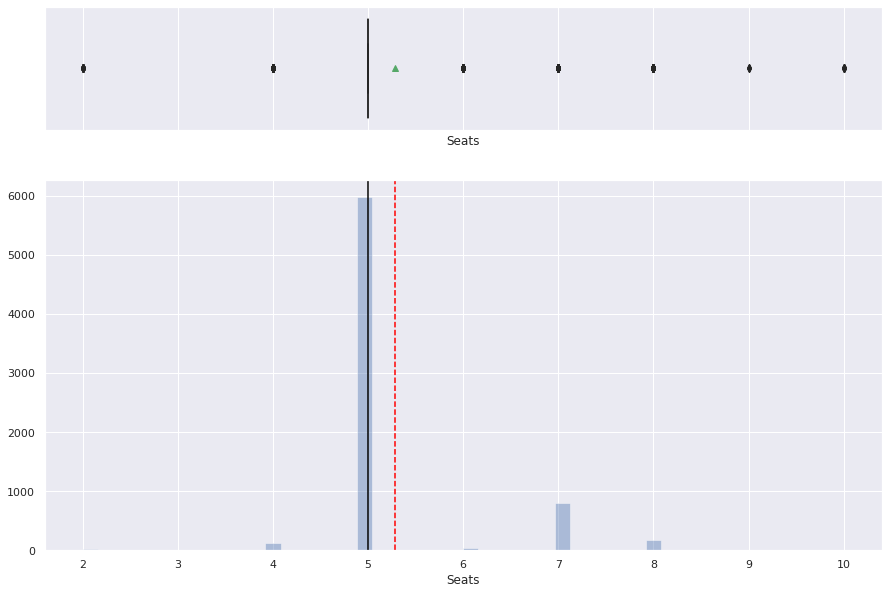

In [ ]:
histogram_boxplot(data["Seats"])

Observation:

*  The distribution shows that most cars are with 5 seats.

Mileage

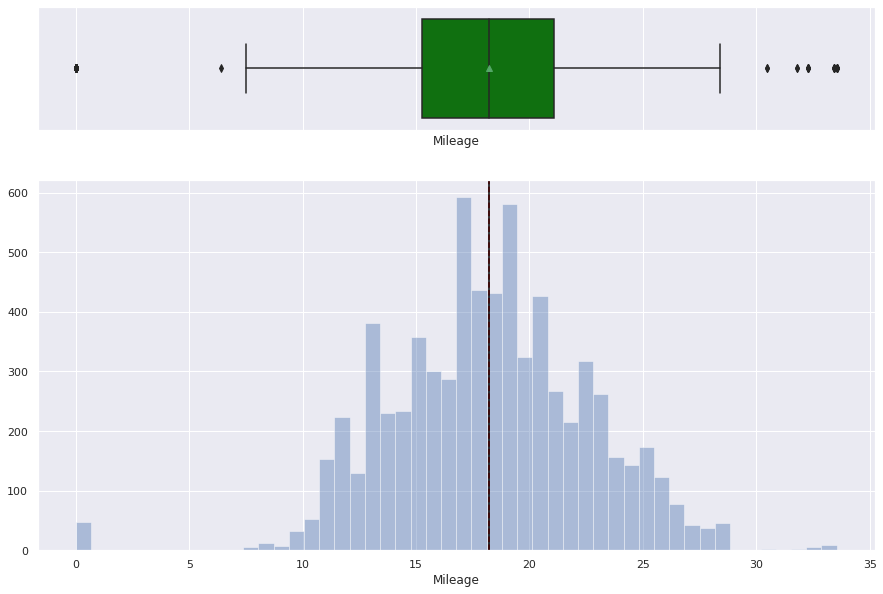

In [ ]:
histogram_boxplot(data["Mileage"])

Observation:

*  The mileage is relatively normally distributed.

Engine

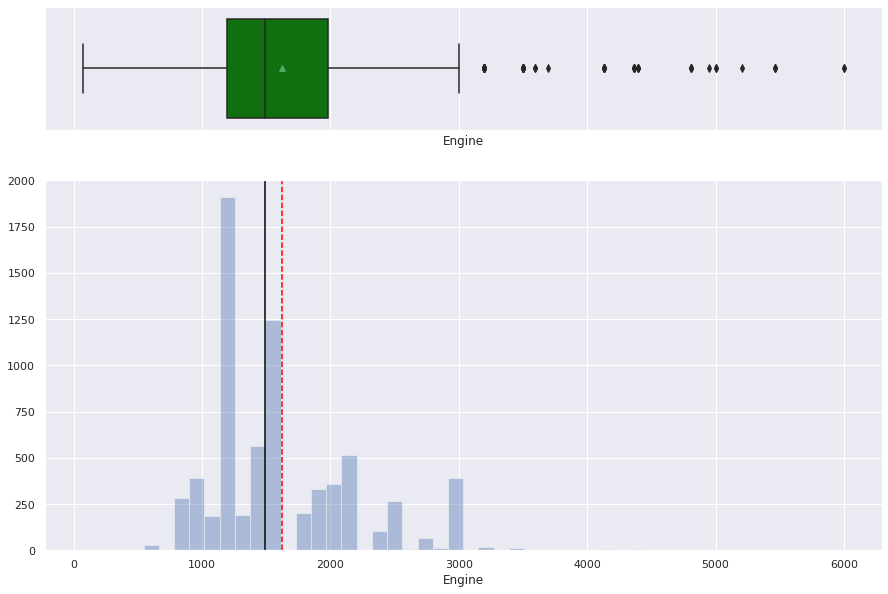

In [ ]:
histogram_boxplot(data["Engine"])

Observation:

* The distribution is right-skewed. 

Power

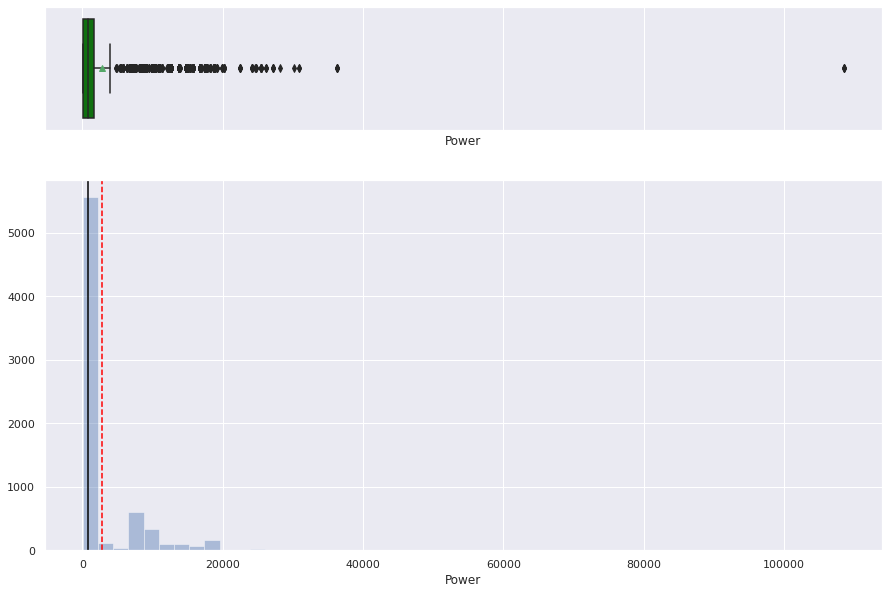

In [ ]:
histogram_boxplot(data["Power"])

Observation:

*  The distribution is heavily right-skewed. 

Categorical Variables

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

Fuel Type

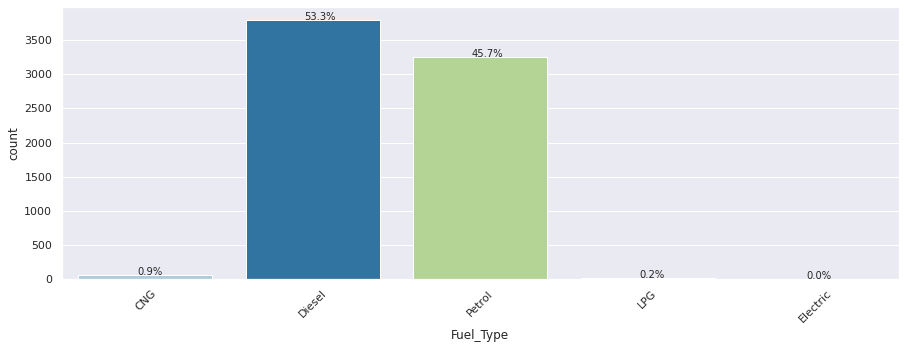

In [ ]:
perc_on_bar(data, "Fuel_Type")

Observation:

* The distribution of fuel type shows that most cars in the data set are using disel followed by those that run on petrol.

Transmission

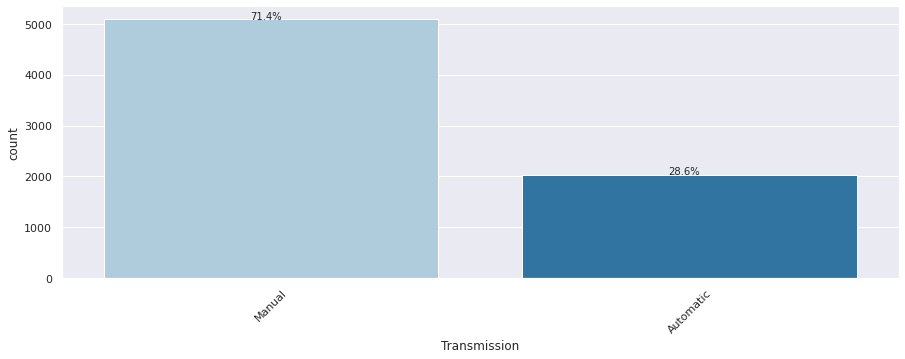

In [ ]:
perc_on_bar(data, "Transmission")

Observation:

*  The distribution indicates that most cars are with manual transmission. 

Onwer Type

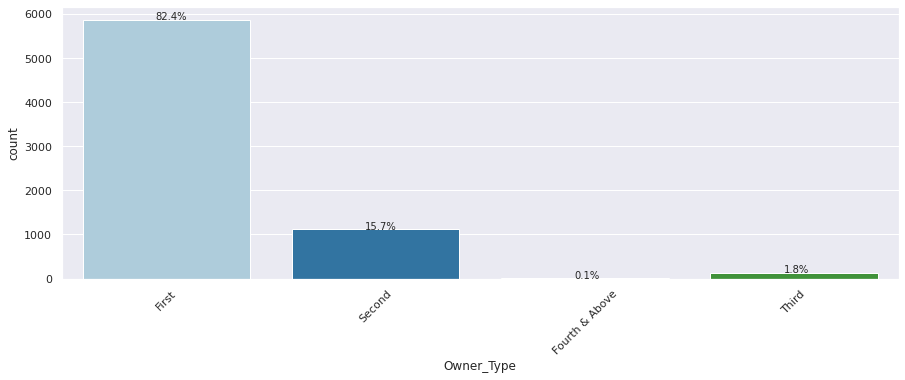

In [ ]:
perc_on_bar(data, "Owner_Type")

Observation:

*  The distribution shows that most cars in the data set had only single owner.

Location

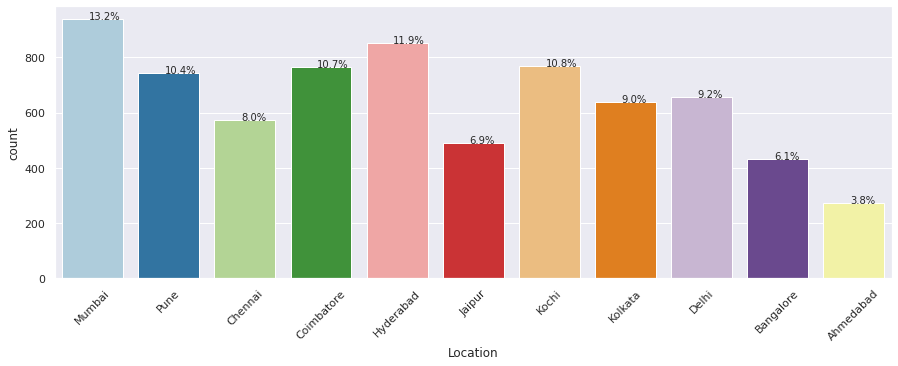

In [ ]:
perc_on_bar(data, "Location")

Observation:

*  The distribution of Location shows that most cars are available in Mumbai follwoed by Hyderabad and Kochi. 

## Bivariate analysis

In [ ]:
# creating a list of non-tag columns
corr_cols = [item for item in data.columns if "tag" not in item]
print(corr_cols)

['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


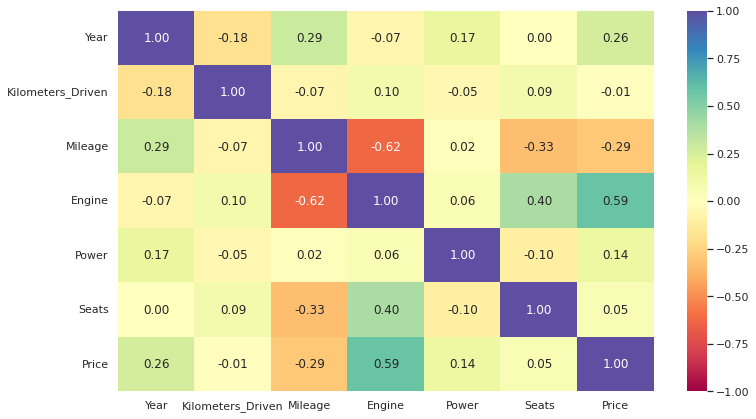

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observation:

*  The two variables with highest correlation are Price and Engine.
*  The next highest correlation is between Engine and Seats.
* The two variables with weakest correlation are Mileage and Engine. 

Examining the Price variable (target) with some of the categorical columns

Fuel_Type vs Price

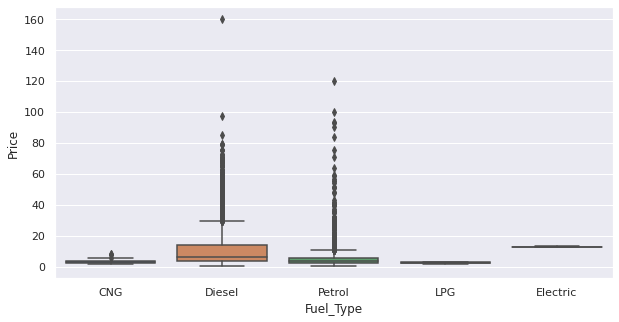

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=data)

Observation:

*  Electric cars have highest price.

Transmission vs Price

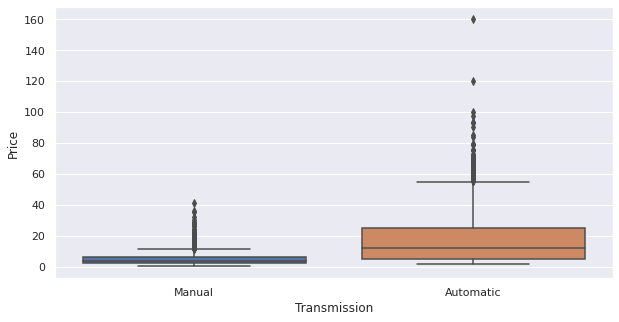

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Transmission", y="Price", data=data)

Observation:

* Cars with manual transmission have lower price than those with automatic.

Owner_Type vs Price

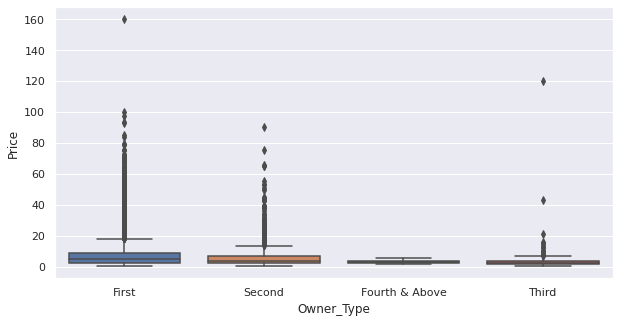

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Owner_Type", y="Price", data=data)

Observation:

* As cars have more owners, the price appears to be lower.

Location vs Price

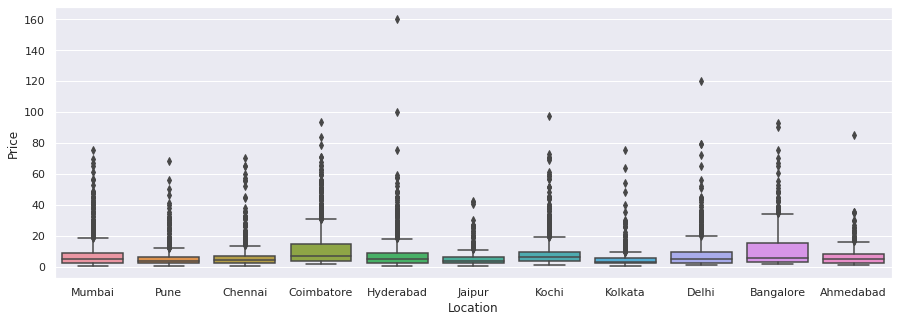

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x="Location", y="Price", data=data)

Observation:

* Cars in Bangalore and Coimbatore have higher price than in other cities. 

# Log Transformations

### Checking numeric columns for skewness
- Some columns are very skewed and will likely behave better on the log scale

### Skewness before log transformations

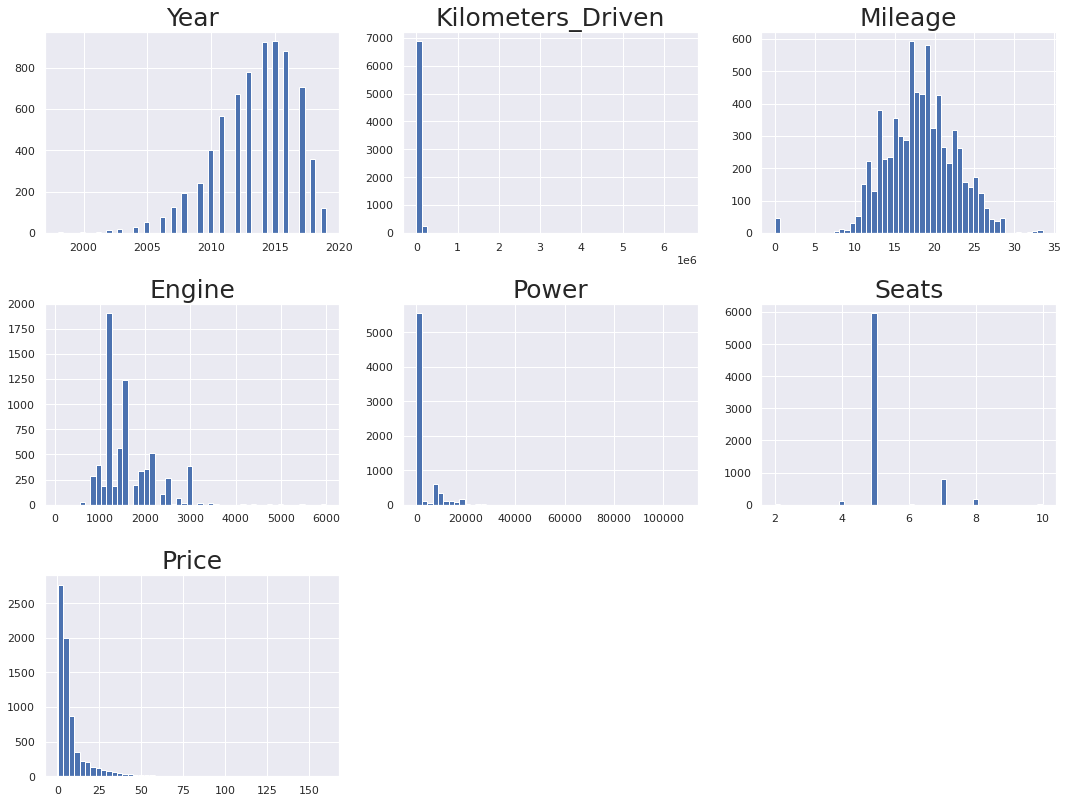

In [ ]:
# creating a list of numeric columns
num_cols = [item for item in data.select_dtypes(include=np.number).columns]


# now, let's plot a histogram of all numeric columns
plt.figure(figsize=(15, 45))

for i in range(len(num_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(data[num_cols[i]], bins=50)
    # sns.histplot(data=df3, x=dist_cols[i], kde=True)
    plt.tight_layout()
    plt.title(num_cols[i], fontsize=25)

plt.show()

- As seen, most of the columns have a very skewed distribution
- Since Mileage and Seats have normal distributions, and Price being the target variable, we can apply the log transformation to the rest columns to deal with skewness in the data

In [ ]:
# creating a list of skewed columns
num_cols.remove("Mileage")
num_cols.remove("Price")
num_cols.remove("Seats")

In [ ]:
num_cols

['Year', 'Kilometers_Driven', 'Engine', 'Power']

In [ ]:
# applying log transforms on num_cols columns

for col in num_cols:
    data[col + "_log"] = np.log(data[col] + 1)

# dropping the original columns
data.drop(num_cols, axis=1, inplace=True)
data.head()

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Price,Year_log,Kilometers_Driven_log,Engine_log,Power_log
0,Mumbai,CNG,Manual,First,26.60,5.0,1.75,7.606387,11.184435,6.906755,8.668540
1,Pune,Diesel,Manual,First,19.67,5.0,12.50,7.608871,10.621352,7.367077,7.141245
2,Chennai,Petrol,Manual,First,18.20,5.0,4.50,7.606885,10.736418,7.090077,6.788972
3,Chennai,Diesel,Manual,First,20.77,7.0,6.00,7.607381,11.373675,7.130099,9.091219
4,Coimbatore,Diesel,Automatic,Second,15.20,5.0,17.74,7.607878,10.613271,7.585281,7.250636


In [ ]:
data.shape

(7123, 11)

### Skewness after applying log transformations

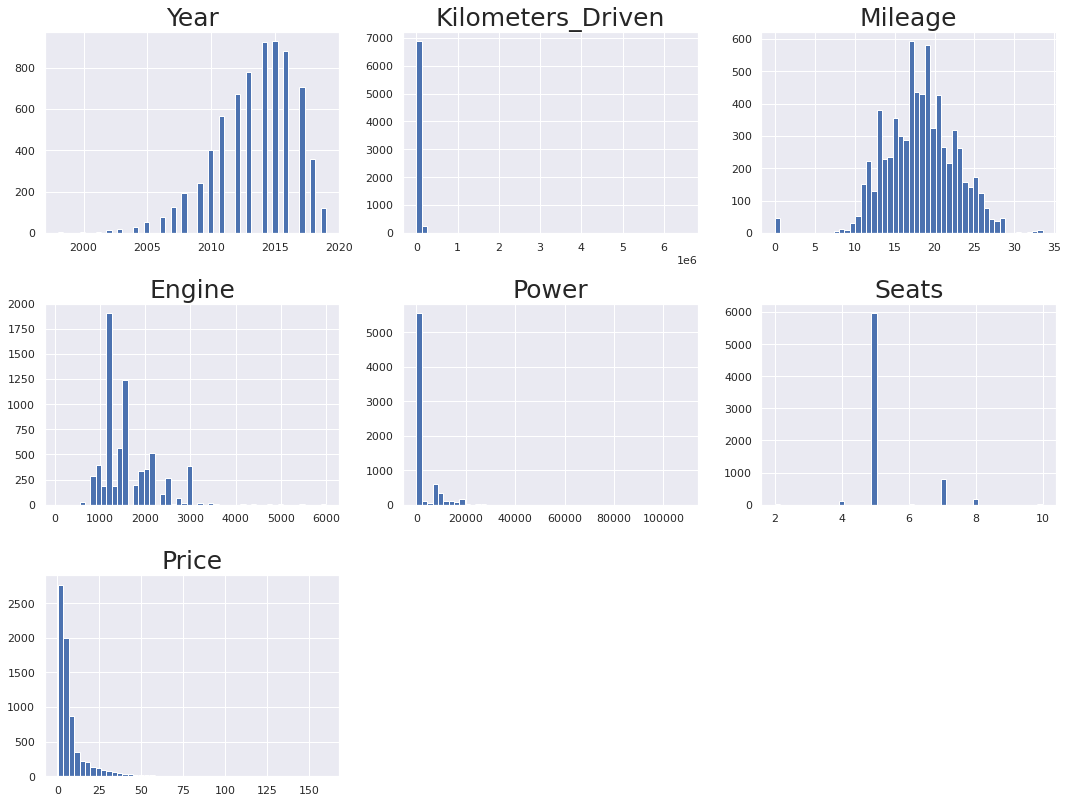

In [ ]:
# creating a list of numeric columns
num_cols = [item for item in data.select_dtypes(include=np.number).columns]


# now, let's plot a histogram of all numeric columns
plt.figure(figsize=(15, 45))

for i in range(len(num_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(data[num_cols[i]], bins=50)
    # sns.histplot(data=df3, x=dist_cols[i], kde=True)
    plt.tight_layout()
    plt.title(num_cols[i], fontsize=25)

plt.show()

- The columns are still skewed, but not as heavily as before log transformations

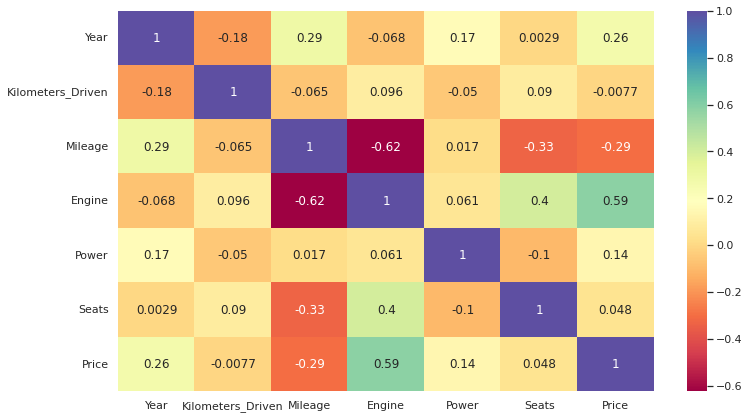

In [ ]:
# checking correlations after applying log transformations
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, cmap= 'Spectral')
plt.show()

Observation:

*  Engine log and Price have the highest correlation.

In [ ]:
data.shape

(7123, 11)

# Outliers 

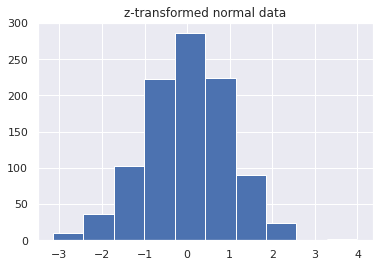

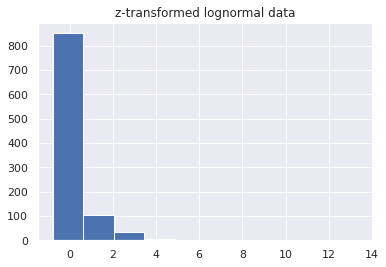

In [ ]:
def z_transform(x):
    return (x - np.mean(x)) / np.std(x)


np.random.seed(1)
x1 = np.random.normal(size=1000)
x2 = np.random.lognormal(size=1000)


plt.hist(z_transform(x1))
plt.title("z-transformed normal data")
plt.show()


plt.hist(z_transform(x2))
plt.title("z-transformed lognormal data")
plt.show()

In [ ]:
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [0.25, 0.75]))
    return np.mean(np.abs(x - np.median(x)) > length)


print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


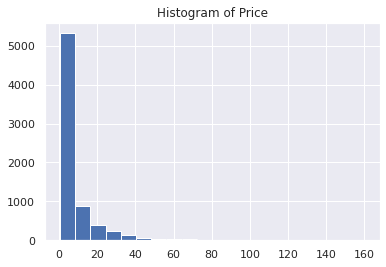

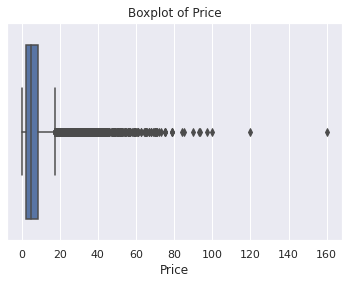

In [ ]:
#Looking at the Price
plt.hist(data["Price"], 20)
plt.title("Histogram of Price")
plt.show()

sns.boxplot(data["Price"])
plt.title("Boxplot of Price")
plt.show()

In [ ]:
# Handling outliers to see the sensitivity to outliers
quartiles = np.quantile(data["Price"][data["Price"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers = data.loc[
    np.abs(data["Price"] - data["Price"].median()) > power_4iqr, "Price"
]
outlier_powers

Q1 = 2.5, Q3 = 8.5, 4*IQR = 24.0


67      35.67
75      29.50
92      39.58
134     54.00
148     37.00
        ...  
5921    36.00
5927    45.52
5946    48.00
5996    30.54
6008    45.00
Name: Price, Length: 398, dtype: float64

# Model Building

### Defining independent and dependent variables

In [ ]:
ind_vars = data.drop(["Price"], axis=1) # all variables are independent except for the Price
dep_var = data[["Price"]] # the only dependent variable is the Price, the target variable

### Creating dummy variables

In [ ]:
#Checking the dtype of the variable:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7123 entries, 0 to 7252
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7123 non-null   object 
 1   Year               7123 non-null   int64  
 2   Kilometers_Driven  7123 non-null   int64  
 3   Fuel_Type          7123 non-null   object 
 4   Transmission       7123 non-null   object 
 5   Owner_Type         7123 non-null   object 
 6   Mileage            7123 non-null   float64
 7   Engine             7123 non-null   int64  
 8   Power              7123 non-null   float64
 9   Seats              7123 non-null   float64
 10  Price              7123 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 925.8+ KB


In [ ]:
# we will create dummy variables for the categorical columns to convert all object or category
# get_dummies is a pandas function

def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998,5816.0,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582,1262.0,5.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199,887.0,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248,8876.0,7.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968,1408.0,5.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


### Splitting data into train and test 

In [ ]:
#Splitting data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ind_vars_num, dep_var, test_size=0.3, random_state=1)

In [ ]:
#Printing number of rows for Train and Test data
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0])

Number of rows in train data = 4986
Number of rows in train data = 2137


### Fitting a linear model

In [ ]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

Examining the coefficients for each variable in the model

In [ ]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,9.402641e-01
Kilometers_Driven,1.823491e-06
Mileage,-1.163745e-01
Engine,9.126831e-03
Power,5.099917e-05
Seats,-2.199491e+00
Location_Bangalore,1.739718e+00
Location_Chennai,6.153799e-01
Location_Coimbatore,1.046570e+00
Location_Delhi,-4.044820e-01


Observation:

*  Coefficients of Year, Engine, Power, Kilometers_Driven, and some Location and Owner_Type are positive, and increase of which will result of increase of the price.
*  Coefficients of Mileage, Seats, some Fuel_Type and some of Owner_Type as well as Locations are negative, and increase of which will result in decrease of the price. 

# Model Performance Check

- Using metric functions to define in sklearn for RMSE, MAE, and 𝑅2.
- Defining a function to calculate adjusted  𝑅2.

In [ ]:
# let's create a function that will print out all the above metrics in one step
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

Examining the coefficients for each variable in the model

In [ ]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,9.402641e-01
Kilometers_Driven,1.823491e-06
Mileage,-1.163745e-01
Engine,9.126831e-03
Power,5.099917e-05
Seats,-2.199491e+00
Location_Bangalore,1.739718e+00
Location_Chennai,6.153799e-01
Location_Coimbatore,1.046570e+00
Location_Delhi,-4.044820e-01


### Checking model performance on train set

In [ ]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  7.259506  4.217019  0.514227      0.511877


### Checking model performance on test set

In [ ]:
# Checking model performance on test set
print("Test Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  7.576056  4.402049  0.519136      0.513672


# Conclusion 

* Output varaible Price, has highest correlation with Engine followed by Seats.
* The lowest correlation for Price is with Mileage.
* RMSE value on the training set is 7.26.
* RMSE value on the test set is 7.58.
* The values on the RMSE indicate that the model is not overfitting.
* Mean Squared Error (MSE) for the training set is 4.22.
* Mean Squared Error (MSE) for the test set is 4.40
* R^2 on the training set is 0.51 indicating that model explains 51% of the total variation in the train set.
* R^2 on the test set is 0.52 indicating that model explains 52% of the total variation in the test set.
* The overall model performance does not appear to be highly satisfactory. 